In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%config InlineBackend.figure_format = 'retina'

In [39]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from Toy_model import *
import sys 
sys.path.append("../utils") 
from Evaluation_plot import *

In [41]:
toymodel = Toymodel()

(1001, 19)


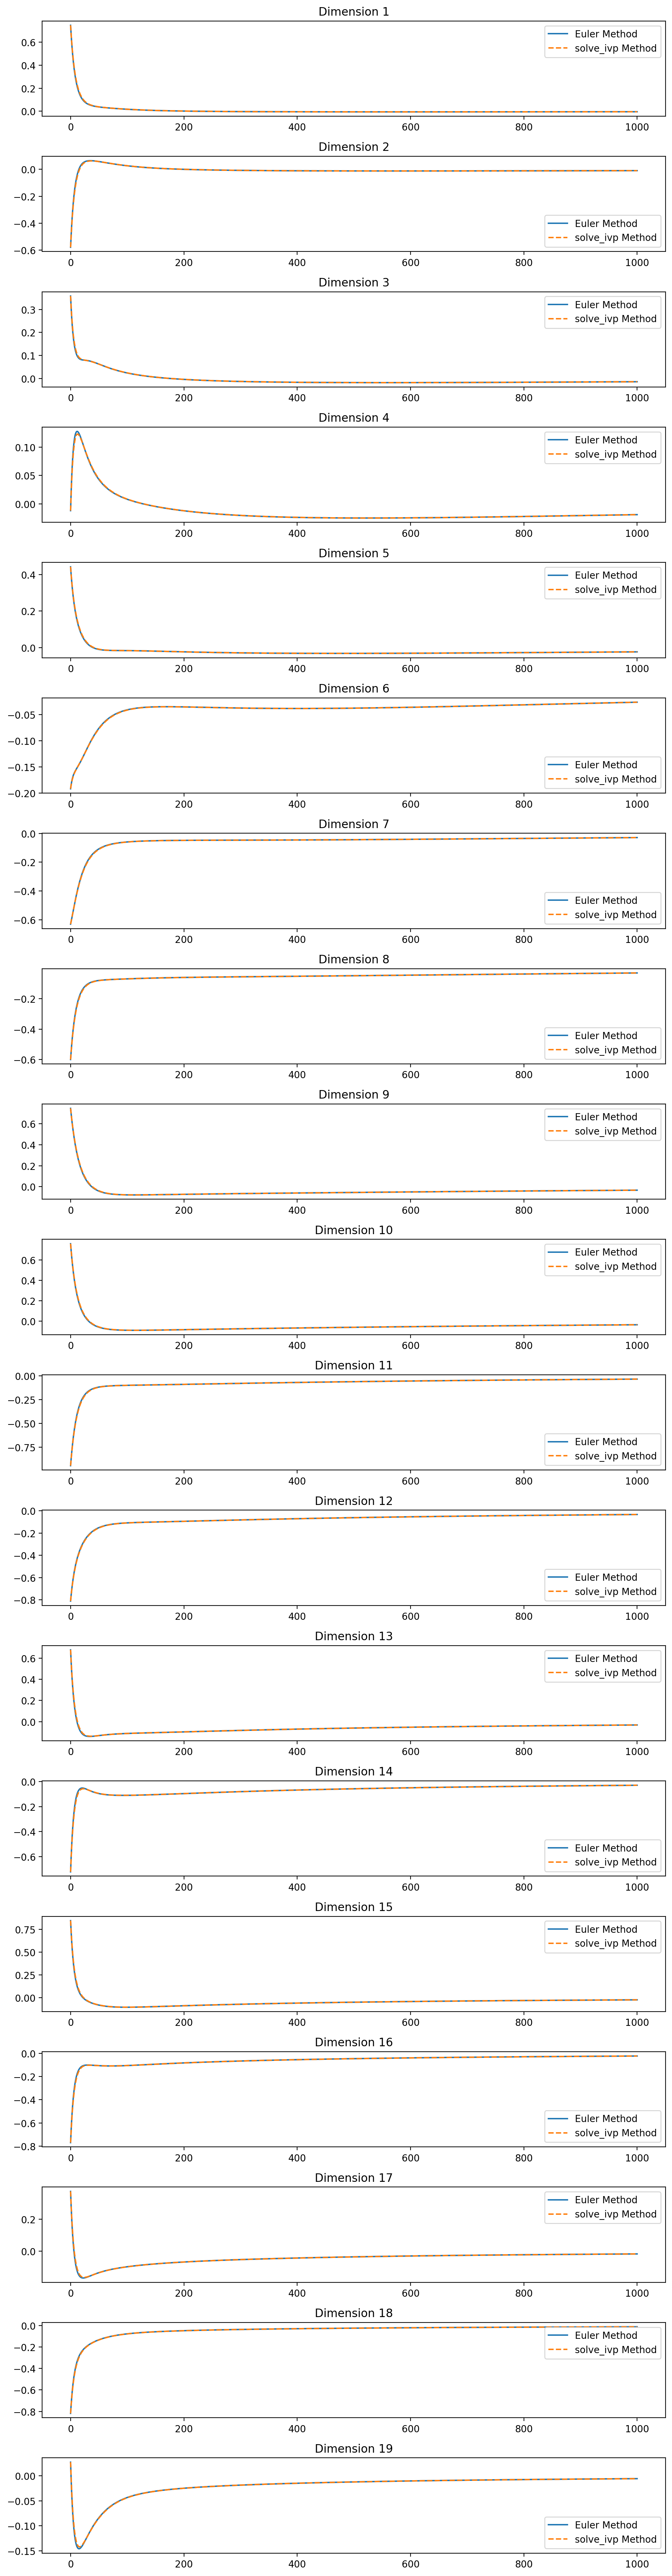

In [42]:
dlt_t = 0.0001
steps = 1000
u0 = 2 * np.random.rand(toymodel.dim - 1) - 1
traj_euler = toymodel.generate_traj(steps, u0, dlt_t = dlt_t)
traj_ivp = toymodel.generate_traj_solve_ivp(steps, u0, dlt_t = dlt_t)

fig, axs = plt.subplots(toymodel.dim - 1, 1, figsize=(10, 2 * (toymodel.dim - 1)))
for i in range(toymodel.dim - 1):
    axs[i].plot(traj_euler[:, i], label='Euler Method')
    axs[i].plot(traj_ivp[:, i], label='solve_ivp Method', linestyle='--')
    axs[i].set_title(f'Dimension {i+1}')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [43]:
# data_x, data_y, data_lace_x, data_lace_y = toymodel.genarate_training_data(steps = 10, traj_num = 500, dlt_t = dlt_t, type = 'Euler-forward')
x_data, y_data, x_laplace_data, y_laplace_data = toymodel.genarate_training_data(steps = 10, traj_num = 500, dlt_t = dlt_t, type = 'Solve_ivp')

(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(11, 19)
(

In [47]:
# Dictionary setting
error_bound = 1e-8
poly = DicPoly(10)

In [48]:
combined_model_euler_forward = LinearModelCombiningNN()
err_history_euler_forward = combined_model_euler_forward.iterative_train(x_data, y_data, 
                        x_laplace_data, y_laplace_data, 
                        error_bound, epochs = 5, type = 'Euler-forward', 
                        acc = False)


0.03767851757785233
Epoch 1/5
2375/2375 - 6s - loss: 0.0046 - val_loss: 0.0034 - 6s/epoch - 3ms/step
Epoch 2/5
2375/2375 - 5s - loss: 0.0034 - val_loss: 0.0033 - 5s/epoch - 2ms/step
Epoch 3/5
2375/2375 - 5s - loss: 0.0034 - val_loss: 0.0035 - 5s/epoch - 2ms/step
Epoch 4/5
2375/2375 - 5s - loss: 0.0034 - val_loss: 0.0033 - 5s/epoch - 2ms/step
Epoch 5/5
2375/2375 - 5s - loss: 0.0034 - val_loss: 0.0033 - 5s/epoch - 2ms/step
0.03754421420507998
Epoch 1/5
2375/2375 - 6s - loss: 0.0036 - val_loss: 0.0036 - 6s/epoch - 3ms/step
Epoch 2/5
2375/2375 - 6s - loss: 0.0036 - val_loss: 0.0037 - 6s/epoch - 3ms/step
Epoch 3/5
2375/2375 - 6s - loss: 0.0036 - val_loss: 0.0036 - 6s/epoch - 3ms/step
Epoch 4/5
2375/2375 - 6s - loss: 0.0036 - val_loss: 0.0037 - 6s/epoch - 2ms/step
Epoch 5/5
2375/2375 - 6s - loss: 0.0036 - val_loss: 0.0036 - 6s/epoch - 2ms/step
0.037473067590681794
Epoch 1/5
2375/2375 - 7s - loss: 0.0038 - val_loss: 0.0040 - 7s/epoch - 3ms/step
Epoch 2/5
2375/2375 - 6s - loss: 0.0038 - val_lo

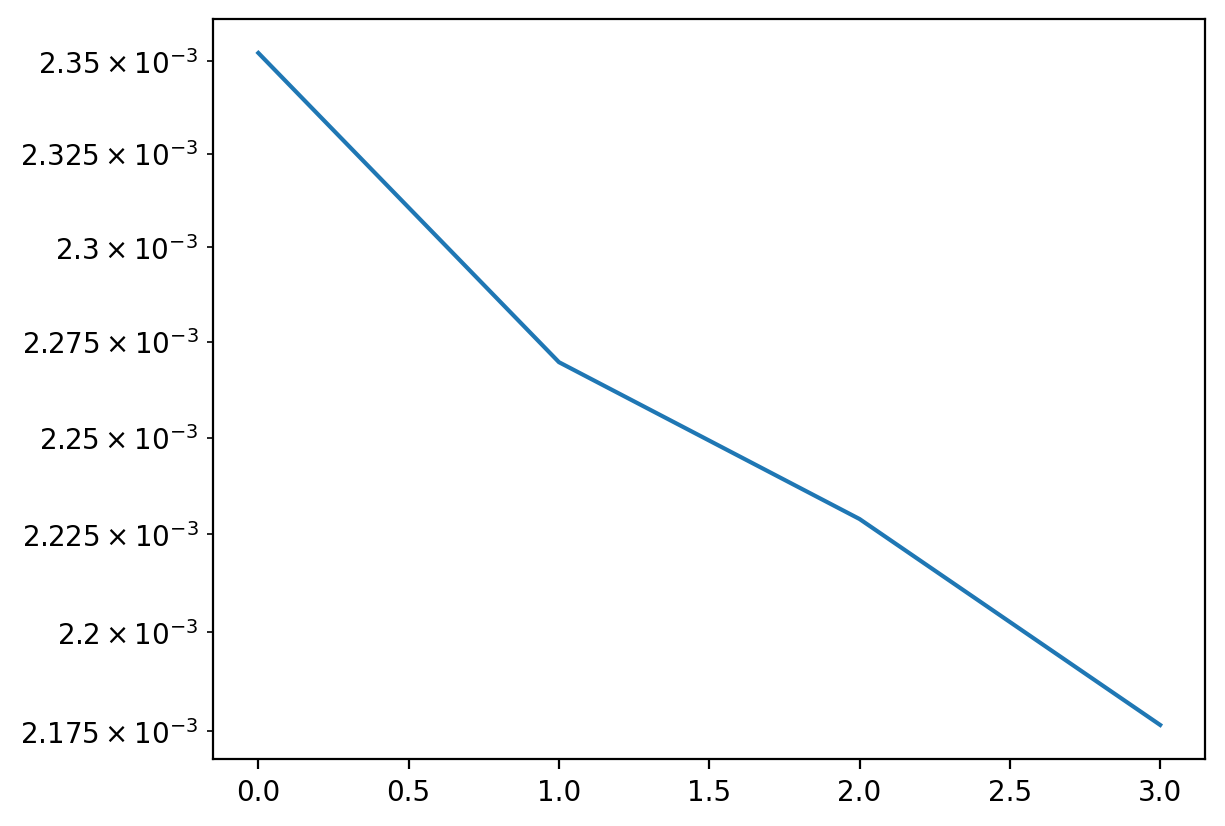

In [50]:
plt.plot(err_history_euler_forward)
plt.yscale('log')